In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
from mpl_toolkits.mplot3d import Axes3D

In [102]:
cube = pd.read_csv("dane/cube.csv")
cube_x=cube["x"]
cube_y=cube["y"]
cube_z=cube["z"]
cube_c=cube["c"]

In [105]:
abs(min(cube_x)) +abs(max(cube_x))

6.98221554810815

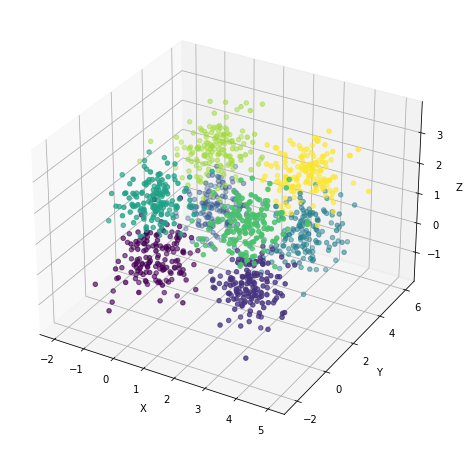

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(cube_x, cube_y, cube_z, c=cube_c)

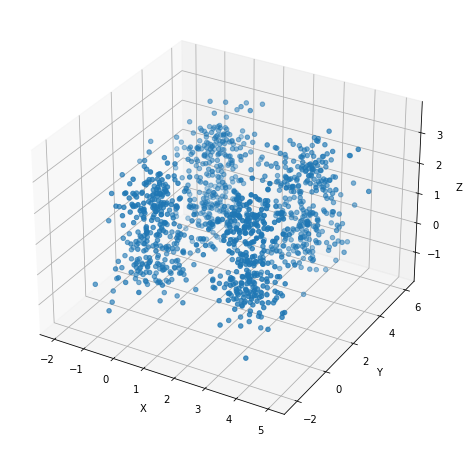

In [13]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(cube_x, cube_y, cube_z)

In [106]:
hexagon = pd.read_csv("dane/hexagon.csv")

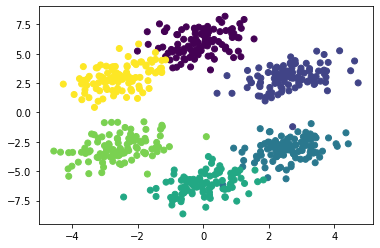

In [64]:
fig = plt.figure(figsize=(6,4))
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.scatter(hexagon["x"], hexagon["y"], c=hexagon["c"])

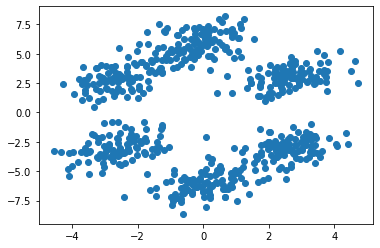

In [65]:
fig = plt.figure(figsize=(6,4))
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.scatter(hexagon["x"], hexagon["y"])

In [107]:
hex_x = hexagon[["x","y"]]
hex_x = np.array(hex_x)
hex_y = hexagon["y"]
hex_y = np.array(hex_y)

In [111]:
abs(min(hexagon["x"])) +abs(max(hexagon["x"]))

9.28872591616441

# implementacja - sieć Kohonena

In [67]:
import numpy as np

class KohonenNetwork:
    def __init__(self, input_dim, output_dim, learning_rate=0.1, epochs=100, neighborhood_function="gauss", eta=1):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.eta = eta
        self.array_ = []
        self.weights = np.random.rand(output_dim[0], output_dim[1], input_dim)
        self.cluster_labels = self.assign_cluster_labels()
        if neighborhood_function=="gauss": self.N_F = self.gaussian_function
        if neighborhood_function=="gauss_2der": self.N_F = self.derivative2_gaussian

    def gaussian_function(self, winner, neuron, t):
        distance = np.sqrt((winner[0] - neuron[0])**2 + (winner[1] - neuron[1])**2)
        return np.exp(-(distance*t)**2)
    
    def derivative2_gaussian(self, winner, neuron, t):
        distance = np.sqrt((winner[0] - neuron[0])**2 + (winner[1] - neuron[1])**2)
        return -np.exp(-(distance * t)**2) * (4 * (distance**2) * (t**2) - 2)

    def alfa(self, t):
        return self.learning_rate * np.exp(-t/(self.epochs+1))

    def train(self, input_data):
        for t in range(1, self.epochs+1):
            total_distance_before = 0
            total_distance_after = 0
            for x in input_data:
                winner_index = self.find_winner(x)
                for i in range(self.output_dim[0]):
                    for j in range(self.output_dim[1]):
                        distance_before = np.sqrt(np.sum((x - self.weights[i, j]) ** 2)) # for error
                        total_distance_before += distance_before # for error

                        influence = self.N_F(winner_index, (i, j), t)
                        self.weights[i, j] += influence * self.eta * self.alfa(t) * (x - self.weights[i, j])

                        distance_after = np.sqrt(np.sum((x - self.weights[i, j]) ** 2)) # for error
                        total_distance_after += distance_after # for error
            self.array_.append(abs(total_distance_after-total_distance_before))

    def find_winner(self, x):
        distances = np.sum((self.weights - x)**2, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)
    
    def assign_cluster_labels(self):
        num_clusters = np.prod(self.output_dim)
        return np.arange(num_clusters)

    def predict(self, input_data):
        predictions = []
        for x in input_data:
            winner_index = self.find_winner(x)
            cluster_label = self.cluster_labels[winner_index[0] * self.output_dim[1] + winner_index[1]]
            predictions.append(cluster_label)
        return predictions

    
    def show_error(self):
        plt.plot([i for i in range(1, len(self.array_)+1)], self.array_)
        plt.xlabel('Epoka')
        plt.ylabel('Suma odległości')
        plt.show()


# 1 - zbiór hexagon

In [94]:
# Przykładowe dane
input_data = hex_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=2, output_dim=(5, 5), learning_rate=0.1, epochs=100, neighborhood_function="gauss", eta=0.5)
kohonen_network.train(input_data)

predictions = kohonen_network.predict(hex_x)
print("Predictions:", predictions)

Predictions: [10, 6, 16, 15, 9, 16, 15, 15, 23, 1, 18, 15, 1, 20, 17, 21, 10, 6, 12, 6, 14, 2, 4, 22, 17, 2, 18, 6, 10, 5, 2, 2, 24, 9, 16, 10, 10, 18, 19, 3, 3, 14, 9, 21, 22, 15, 10, 7, 3, 19, 22, 24, 2, 11, 2, 18, 1, 0, 1, 10, 14, 9, 18, 2, 6, 7, 19, 24, 9, 9, 18, 14, 9, 1, 20, 19, 6, 1, 5, 15, 2, 18, 18, 18, 17, 20, 2, 4, 19, 18, 22, 17, 23, 2, 3, 17, 15, 23, 21, 23, 2, 17, 20, 14, 15, 0, 4, 14, 9, 15, 5, 7, 21, 15, 22, 14, 15, 24, 5, 22, 10, 21, 18, 2, 3, 0, 10, 24, 15, 1, 5, 2, 18, 2, 1, 22, 10, 4, 12, 20, 19, 7, 11, 17, 4, 14, 17, 6, 7, 5, 1, 16, 17, 24, 2, 9, 23, 22, 21, 7, 15, 17, 22, 22, 11, 6, 12, 15, 3, 17, 23, 6, 21, 11, 24, 6, 17, 12, 4, 7, 12, 15, 18, 16, 10, 16, 14, 7, 12, 4, 7, 1, 1, 23, 2, 18, 20, 2, 21, 6, 9, 12, 2, 8, 1, 19, 21, 0, 18, 22, 4, 5, 17, 23, 23, 16, 4, 2, 6, 11, 2, 11, 16, 7, 4, 22, 4, 15, 21, 21, 10, 6, 21, 17, 4, 16, 9, 23, 0, 23, 7, 18, 15, 15, 23, 14, 7, 17, 19, 21, 20, 16, 17, 15, 22, 4, 22, 15, 21, 22, 5, 6, 19, 1, 24, 16, 2, 23, 14, 24, 6, 0, 17, 

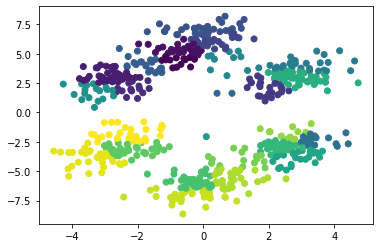

In [95]:
fig = plt.figure(figsize=(6,4))
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.scatter(hexagon["x"], hexagon["y"], c=predictions)

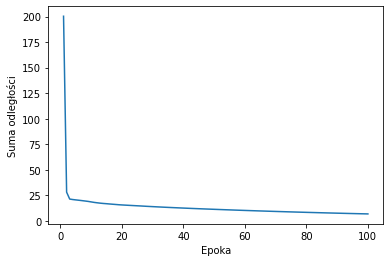

In [96]:
kohonen_network.show_error()

In [97]:
kohonen_network.array_[-1]

6.91666249348782

/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_40946/1114411889.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


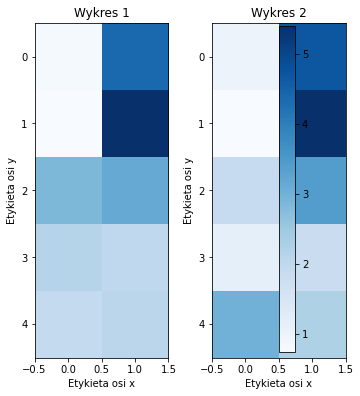

In [99]:
fig, axes = plt.subplots(1, 2,figsize=(5, 6))

# Pierwszy wykres
im1 = axes[0].imshow(abs(kohonen_network.weights)[0], cmap='Blues', interpolation='nearest')
axes[0].set_title('Wykres 1')
axes[0].set_xlabel('Etykieta osi x')
axes[0].set_ylabel('Etykieta osi y')
axes[0].grid(False)

# Drugi wykres
im2 = axes[1].imshow(abs(kohonen_network.weights)[1], cmap='Blues', interpolation='nearest')
axes[1].set_title('Wykres 2')
axes[1].set_xlabel('Etykieta osi x')
axes[1].set_ylabel('Etykieta osi y')
axes[1].grid(False)

# Dodanie kolorowej skali
fig.colorbar(im1, ax=axes.ravel().tolist())
plt.tight_layout()
plt.show()

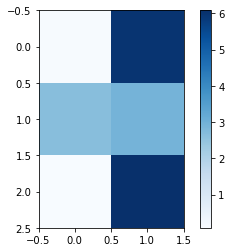

In [80]:
plt.imshow(abs(kohonen_network.weights)[1], cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()

# 2 - zbiór cube

In [99]:
cube_x=np.array(cube[["x","y","z"]])

In [108]:
# Przykładowe dane
input_data = cube_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=3, output_dim=(5, 5), learning_rate=0.01, epochs=100, neighborhood_function="gauss", eta=0.9)
kohonen_network.train(input_data)

predictions = kohonen_network.predict(cube_x)
print("Predictions:", predictions)

Predictions: [24, 19, 19, 12, 13, 13, 20, 23, 19, 22, 2, 12, 19, 24, 13, 19, 18, 13, 23, 13, 13, 14, 18, 13, 18, 12, 19, 23, 12, 18, 13, 2, 23, 12, 20, 13, 23, 18, 19, 12, 14, 13, 24, 24, 19, 20, 15, 19, 18, 13, 23, 23, 12, 16, 2, 19, 2, 2, 13, 24, 12, 14, 14, 12, 19, 12, 13, 23, 12, 14, 24, 14, 12, 23, 19, 12, 2, 14, 18, 23, 19, 24, 18, 15, 18, 13, 2, 18, 22, 19, 24, 13, 14, 12, 12, 12, 13, 14, 20, 14, 13, 23, 19, 24, 13, 13, 18, 12, 2, 23, 13, 12, 7, 20, 23, 13, 18, 23, 13, 2, 18, 18, 15, 12, 13, 23, 18, 13, 13, 19, 14, 19, 13, 15, 19, 18, 12, 18, 14, 24, 17, 14, 13, 18, 19, 18, 20, 18, 18, 14, 8, 7, 8, 8, 9, 8, 9, 9, 9, 8, 9, 8, 8, 7, 8, 8, 9, 8, 9, 9, 9, 7, 8, 9, 9, 7, 8, 9, 9, 8, 9, 9, 9, 9, 8, 8, 9, 7, 8, 7, 9, 8, 9, 9, 9, 8, 7, 7, 8, 9, 8, 8, 8, 8, 9, 7, 9, 7, 9, 9, 8, 7, 7, 9, 8, 9, 7, 8, 8, 9, 8, 8, 9, 8, 9, 8, 8, 9, 8, 9, 8, 8, 9, 9, 8, 9, 8, 9, 8, 9, 9, 8, 9, 9, 9, 9, 8, 9, 8, 8, 9, 7, 9, 9, 9, 9, 8, 9, 8, 9, 9, 8, 9, 8, 9, 9, 8, 9, 9, 8, 7, 9, 9, 9, 9, 7, 7, 9, 8, 9, 8, 8, 

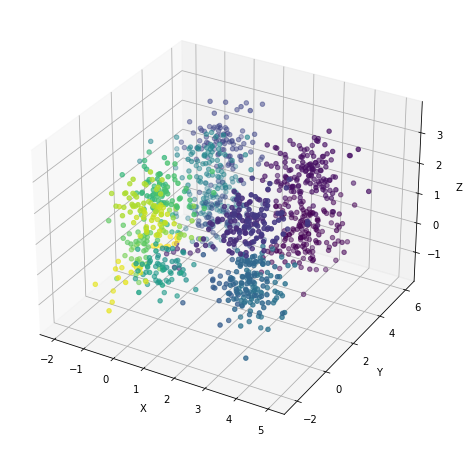

In [109]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(cube["x"], cube_y, cube_z, c=predictions)

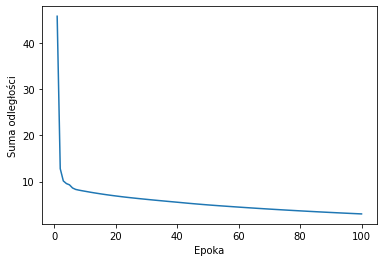

In [110]:
kohonen_network.show_error()

In [111]:
kohonen_network.array_[-1]

2.9822312352480367

# 2 derivative function

Cube

In [137]:
# Przykładowe dane
input_data = cube_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=3, output_dim=(3, 3), learning_rate=0.001, epochs=1000, neighborhood_function="gauss_2der")
kohonen_network.train(input_data)

predictions = kohonen_network.predict(cube_x)
print("Predictions:", predictions)

Predictions: [6, 0, 0, 6, 0, 0, 6, 8, 0, 2, 6, 0, 0, 6, 0, 0, 0, 0, 8, 0, 0, 8, 8, 0, 8, 6, 0, 8, 6, 0, 6, 6, 8, 6, 6, 0, 8, 0, 0, 6, 8, 6, 0, 6, 0, 6, 6, 0, 0, 6, 8, 8, 6, 5, 6, 0, 6, 6, 0, 6, 6, 8, 8, 6, 0, 6, 8, 8, 6, 8, 0, 8, 6, 8, 0, 6, 0, 8, 8, 8, 0, 6, 0, 6, 0, 0, 6, 8, 2, 0, 6, 0, 8, 6, 6, 6, 0, 8, 8, 8, 6, 8, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 6, 6, 8, 0, 0, 8, 0, 6, 8, 8, 6, 6, 0, 8, 8, 0, 0, 0, 6, 0, 0, 6, 0, 8, 6, 0, 8, 6, 5, 8, 0, 8, 0, 0, 6, 5, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

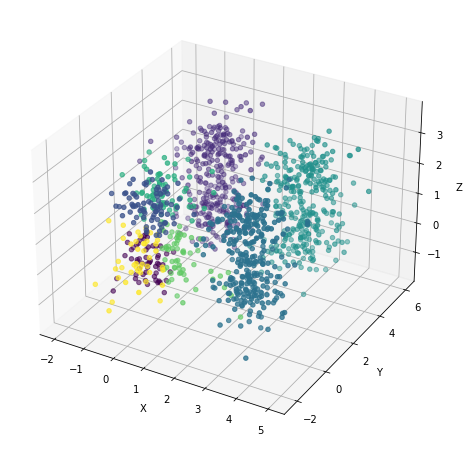

In [138]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(cube["x"], cube_y, cube_z, c=predictions)

Hexagon

In [133]:
# Przykładowe dane
input_data = hex_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=2, output_dim=(2, 3), learning_rate=0.001, epochs=100, neighborhood_function="gauss_2der")
kohonen_network.train(input_data)

predictions = kohonen_network.predict(hex_x)
print("Predictions:", predictions)

Predictions: [0, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 1, 3, 4, 4, 0, 1, 5, 1, 3, 5, 0, 4, 4, 5, 2, 1, 0, 1, 5, 5, 2, 3, 3, 0, 0, 2, 3, 5, 5, 3, 3, 4, 4, 0, 0, 5, 5, 4, 4, 2, 5, 1, 5, 2, 1, 1, 1, 0, 3, 3, 2, 5, 1, 5, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 1, 0, 5, 2, 2, 2, 4, 3, 5, 0, 3, 2, 4, 4, 2, 5, 5, 4, 0, 2, 4, 2, 5, 4, 3, 3, 0, 5, 0, 3, 3, 0, 1, 5, 4, 0, 4, 3, 0, 2, 1, 4, 0, 4, 2, 5, 5, 1, 0, 2, 0, 1, 1, 5, 2, 5, 1, 4, 0, 0, 5, 3, 4, 5, 1, 4, 0, 3, 4, 1, 5, 1, 1, 3, 4, 2, 5, 3, 2, 4, 4, 1, 0, 4, 4, 4, 1, 1, 5, 0, 5, 4, 2, 1, 4, 0, 2, 1, 4, 5, 0, 5, 5, 0, 2, 3, 0, 3, 3, 5, 5, 0, 5, 1, 1, 2, 5, 2, 3, 5, 4, 1, 3, 5, 5, 0, 1, 3, 4, 1, 2, 4, 0, 1, 4, 2, 2, 3, 0, 5, 1, 1, 5, 0, 3, 5, 0, 4, 0, 0, 4, 4, 0, 1, 4, 4, 0, 3, 3, 2, 1, 2, 5, 2, 0, 0, 2, 3, 1, 4, 3, 4, 3, 3, 4, 0, 4, 0, 4, 0, 4, 4, 1, 1, 3, 1, 2, 3, 5, 2, 3, 2, 1, 1, 4, 5, 3, 0, 2, 1, 2, 0, 1, 5, 3, 2, 3, 4, 0, 4, 1, 4, 2, 1, 3, 3, 1, 4, 2, 1, 2, 5, 4, 0, 3, 2, 4, 5, 1, 1, 2, 1, 3, 5, 2, 2, 0, 3, 0, 1, 4, 4, 1, 1, 3, 3, 4, 2, 4, 4, 1,

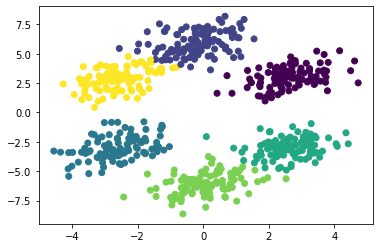

In [134]:
fig = plt.figure(figsize=(6,4))
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.scatter(hexagon["x"], hexagon["y"], c=predictions)

In [112]:
import tensorflow as tf

# Pobranie zbioru danych MNIST
mnist = tf.keras.datasets.mnist

# Wczytanie danych treningowych i testowych
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizacja danych (przeskalowanie wartości pikseli do zakresu [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

: 

In [1]:
from sklearn.datasets import make_moons

# Ustawienie parametrów, na przykład liczba próbek i hałasu
n_samples = 1000
noise = 0.1

# Generowanie zbioru danych "moon"
X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)

No handles with labels found to put in legend.


Text(0, 0.5, 'Współrzędna y')

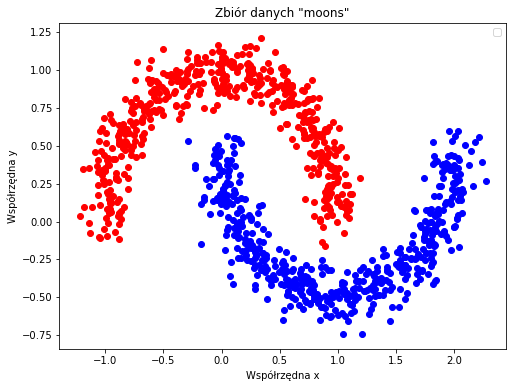

In [10]:
plt.figure(figsize=(8, 6))

# Narysowanie danych dla klasy 0 (moony)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red')

# Narysowanie danych dla klasy 1 (moony)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue')

# Dodanie legendy
plt.legend()

# Dodanie tytułu i etykiet osi
plt.title('Zbiór danych "moons"')
plt.xlabel('Współrzędna x')
plt.ylabel('Współrzędna y')

In [33]:
# Przykładowe dane
input_data = X[:, 0]

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=2, output_dim=(1, 2), learning_rate=0.1, epochs=100, neighborhood_function="gauss", eta=0.2)
kohonen_network.train(input_data)

predictions = kohonen_network.predict(input_data)
print("Predictions:", predictions)

Predictions: [0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [22]:
X, _ = make_moons(n_samples=n_samples, noise=noise, random_state=42)

Text(0, 0.5, 'Y')

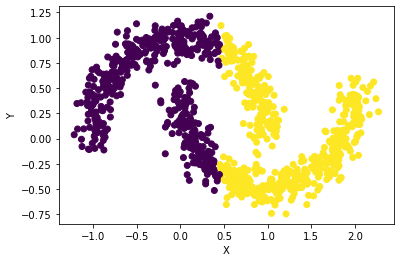

In [34]:
plt.scatter(X[:,0], X[:,1], c=predictions)

# Dodanie etykiet osi
plt.xlabel("X")
plt.ylabel("Y")

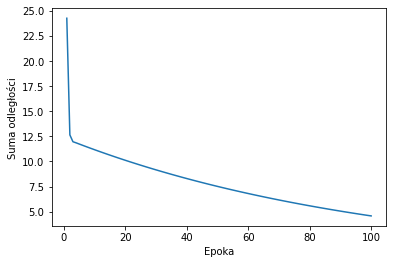

In [36]:
kohonen_network.show_error()

In [41]:
import numpy as np

class KohonenNetwork:
    def __init__(self, input_dim, num_hexagons, learning_rate=0.1, epochs=100, neighborhood_function="gauss", eta=1):
        self.input_dim = input_dim
        self.num_hexagons = num_hexagons
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.eta = eta
        self.array_ = []
        self.weights = np.random.rand(num_hexagons, 2 * num_hexagons - 1, input_dim)
        self.cluster_labels = self.assign_cluster_labels()
        if neighborhood_function=="gauss": 
            self.N_F = self.gaussian_function
        if neighborhood_function=="gauss_2der": 
            self.N_F = self.derivative2_gaussian

    def gaussian_function(self, winner, neuron, t):
        distance = np.sqrt((winner[0] - neuron[0])**2 + (winner[1] - neuron[1])**2)
        return np.exp(-(distance*t)**2)
    
    def derivative2_gaussian(self, winner, neuron, t):
        distance = np.sqrt((winner[0] - neuron[0])**2 + (winner[1] - neuron[1])**2)
        return -np.exp(-(distance * t)**2) * (4 * (distance**2) * (t**2) - 2)

    def alfa(self, t):
        return self.learning_rate * np.exp(-t/(self.epochs+1))

    def train(self, input_data):
        for t in range(1, self.epochs+1):
            total_distance_before = 0
            total_distance_after = 0
            for x in input_data:
                winner_index = self.find_winner(x)
                for i in range(self.num_hexagons):
                    for j in range(2 * self.num_hexagons - 1):
                        distance_before = np.sqrt(np.sum((x - self.weights[i, j]) ** 2))
                        total_distance_before += distance_before

                        influence = self.N_F(winner_index, (i, j), t)
                        self.weights[i, j] += influence * self.eta * self.alfa(t) * (x - self.weights[i, j])

                        distance_after = np.sqrt(np.sum((x - self.weights[i, j]) ** 2))
                        total_distance_after += distance_after
            self.array_.append(abs(total_distance_after-total_distance_before))

    def find_winner(self, x):
        distances = np.sum((self.weights - x)**2, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)
    
    def assign_cluster_labels(self):
        num_clusters = self.num_hexagons * (2 * self.num_hexagons - 1)
        return np.arange(num_clusters)

    def predict(self, input_data):
        predictions = []
        for x in input_data:
            winner_index = self.find_winner(x)
            cluster_label = self.cluster_labels[winner_index[0] * (2 * self.num_hexagons - 1) + winner_index[1]]
            predictions.append(cluster_label)
        return predictions
    
    def show_error(self):
        plt.plot([i for i in range(1, len(self.array_)+1)], self.array_)
        plt.xlabel('Epoka')
        plt.ylabel('Suma odległości')
        plt.show()


In [59]:
# Przykładowe dane
input_data = hex_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=2, num_hexagons=6, learning_rate=0.1, epochs=100, neighborhood_function="gauss_2der", eta=0.9)
kohonen_network.train(input_data)

predictions = kohonen_network.predict(input_data)
print("Predictions:", predictions)

Predictions: [10, 0, 6, 10, 6, 6, 10, 3, 60, 0, 65, 10, 0, 6, 44, 40, 10, 0, 31, 0, 6, 31, 3, 44, 44, 31, 60, 0, 10, 0, 31, 31, 65, 6, 6, 10, 10, 60, 40, 31, 31, 6, 6, 40, 44, 10, 10, 31, 31, 40, 44, 63, 31, 3, 31, 65, 0, 0, 0, 10, 6, 6, 65, 31, 0, 31, 40, 63, 6, 6, 65, 6, 6, 0, 6, 6, 0, 0, 0, 10, 31, 65, 65, 65, 44, 6, 31, 3, 40, 60, 44, 44, 60, 31, 31, 44, 10, 60, 44, 60, 31, 44, 6, 6, 10, 31, 3, 40, 6, 10, 0, 31, 44, 10, 44, 6, 10, 63, 0, 44, 10, 40, 60, 31, 31, 0, 10, 63, 10, 0, 0, 31, 65, 31, 0, 44, 10, 3, 31, 6, 40, 31, 0, 44, 3, 6, 44, 0, 31, 0, 0, 6, 44, 63, 31, 6, 60, 44, 44, 0, 10, 40, 44, 44, 0, 0, 63, 10, 31, 44, 60, 0, 40, 3, 63, 0, 44, 31, 3, 31, 31, 10, 60, 6, 10, 6, 6, 31, 31, 3, 31, 0, 0, 60, 31, 60, 6, 31, 40, 0, 6, 31, 31, 3, 0, 40, 40, 0, 65, 44, 3, 0, 44, 60, 60, 6, 3, 31, 0, 0, 31, 10, 6, 31, 3, 44, 3, 10, 40, 40, 10, 0, 40, 44, 3, 6, 6, 60, 0, 60, 31, 60, 10, 10, 60, 6, 0, 44, 40, 44, 6, 6, 44, 10, 44, 3, 44, 10, 40, 44, 0, 0, 40, 0, 63, 6, 31, 60, 6, 63, 0, 0, 4

Text(0, 0.5, 'Y')

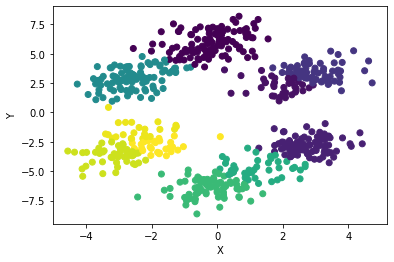

In [60]:
plt.scatter(hex_x[:,0], hex_x[:,1], c=predictions)

# Dodanie etykiet osi
plt.xlabel("X")
plt.ylabel("Y")

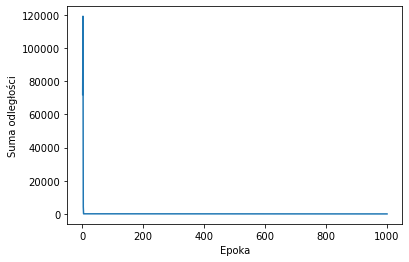

In [61]:
kohonen_network.show_error()

In [62]:
kohonen_network.array_[-1]

37.2265690267086

In [58]:
import gzip
import numpy as np

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28*28)
    return data

filename = 'dane/t10k-images.idx3-ubyte.gz'
images = load_mnist_images(filename)
print(images.shape)  # Wyświetla rozmiar danych obrazów MNIST


BadGzipFile: Not a gzipped file (b'PK')

In [ ]:
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        data = np.fromfile(f, dtype=np.uint8, offset=16)
    data = data.reshape(-1, 28*28)
    return data

filename = 't10k-images.idx3-ubyte'
images = load_mnist_images(filename)
print(images.shape)  # Wyświetla rozmiar danych obrazów MNIST